## Problem
_Predict the likelihood of diabetes progressing through the physiological indicators of the body._

## Data Description:

- Samples: 442 (Information from 442 patients)
- Features:
    Age, Sex , 
    Body mass index, Average blood pressure, S1, S2, S3, S4, S5, S6.
- Target:	Column 11, The indicator evaluates disease progression after 1 year of treatment. 

**! Note: Attribute information data has been normalized**

Data Source: (https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)


## Solution

Assume that the likelihood of diabetes progression (symbol: `y`) is linearly dependent on the patient's physiological information as described above (age, gender, Block index, ... - symbols: `x1, x2, .. x_n`):

`y = w0 + w1*x1 + w1*x2 + ... + w_n*x_n`

Goal: Find a set of weights `[w0, w2, ... w_n]` representing this relationship.

## Libs

- matplotlib: for drawing graphs
- numpy: calculate the transformations on the matrix / vector
- math: perform some calculation functions
- pandas: serving conversion on tabular data
- scikit-learn: (sklearn) library to support the development of machine learning models, training and testing functions.


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import math 

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


## 1. Read the data

Diabetes data supported by sklearn, reading the data through the `datasets.load_diabetes ()` function

See more datasets at https://scikit-learn.org/stable/datasets/index.html#toy-datasets.

The data received in the form of objects with attribute components:
- data: 2-dimensional matrix (442x10) - the patient information is standardized in terms of real numbers.
- target: array of real numbers (442,) - diabetes progression.

In [14]:
# Load diabetes data 
diabetes = datasets.load_diabetes()
print("Input dimensions: ", diabetes.data.shape)
print("Target: ", diabetes.target.shape)
print()

print("The first 5 data samples:")
print("input: ", diabetes.data[:5])
print("target: ",diabetes.target[:5])

Input dimensions:  (442, 10)
Target:  (442,)

The first 5 data samples:
input:  [[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]
target:  [151.  75. 141. 206. 135.]


### Divide the data into 2 sections of 362 training samples and testing 80 samples 

In [15]:
diabetes_X = diabetes.data
#Train data
diabetes_X_train = diabetes_X[:-80]
diabetes_y_train = diabetes.target[:-80]
#Test data 
diabetes_X_test = diabetes_X[-80:]
diabetes_y_test = diabetes.target[-80:]


## 2. Building Regression models using Sklearn

Building regression model (Linear Regression / Ridge Regression) to learn the parameter set
- [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) `linear_model.LinearRegression()`
- [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) `linear_model.Ridge()`

In [16]:
# Build the model by sklearn 
regr = linear_model.LinearRegression()


In [17]:
##### exercise #####
# Requirement: Build ridge regression model with alpha = 0.5
# Read Ridge Regression docs
######################

#regr = None 

######################

## 3. Training:

Use training data to learn the model.

=> Find the weights`[w0, w1, ... w_n]`

In [18]:
# training
regr.fit(diabetes_X_train, diabetes_y_train)
print("[w1, ... w_n] = ", regr.coef_)
print("w0 = ", regr.intercept_)

[w1, ... w_n] =  [   3.92433306 -253.94783649  520.35362721  300.43342402 -603.61603253
  325.29239155   10.80046579  139.51667826  669.06893875  111.45531856]
w0 =  152.7301323963886


In [19]:
##### exercise #####
# Requirement: Compute the predict value of the first sample on test dataset.
# Use the equation: y = w0 + w1*x1 + w1*x2 + ... + w_n*x_n
######################

y_pred_first = None 

######################

## 4. Predict for all samples on test dataset.

In [20]:
# Inference
diabetes_y_pred = regr.predict(diabetes_X_test)
pd.DataFrame(data=np.array([diabetes_y_test, diabetes_y_pred,
                            abs(diabetes_y_test - diabetes_y_pred)]).T,
             columns=["True", "Predict", "Deviation"])  

,True,Predict,Deviation
0,321.0,234.908470,86.091530
1,58.0,163.457251,105.457251
2,262.0,163.571593,98.428407
3,206.0,167.786647,38.213353
4,233.0,254.212487,21.212487
...,...,...,...
75,178.0,191.809673,13.809673
76,104.0,104.520901,0.520901
77,132.0,123.523369,8.476631
78,220.0,209.999198,10.000802


## 5. Evaluation 

Use RMSE measure to calculate the square root of squared error average. 
> $\text{RMSE}(y, \hat{y}) = \sqrt{\frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2}.$

- The smaller the error, the more likely the model is to learn and predict effectively. 
- How small is it? 

In [21]:
math.sqrt(mean_squared_error(diabetes_y_test, diabetes_y_pred))

51.64223924042993

,values
count,80.00000
mean,152.38750
std,78.46994
min,40.00000
25%,72.00000
50%,140.00000
75%,217.50000
max,321.00000


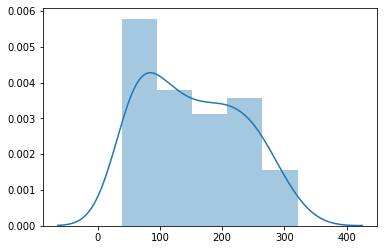

In [22]:
import seaborn as sns
sns.distplot(diabetes_y_test, )
pd.DataFrame(data=diabetes_y_test, columns=["values"]).describe()